In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


In [ ]:
df = pd.read_csv('Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


# EDA




In [ ]:
cats = ['Id','Married/Single','House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Risk_Flag']
df[cats] = df[cats].astype({'Id': 'object', 'Risk_Flag': 'object'})
nums = df.select_dtypes(include=['number']).columns

In [ ]:
df[cats].head()

,Id,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
0,1,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,0
1,2,single,rented,no,Software_Developer,Parbhani,Maharashtra,0
2,3,married,rented,no,Technical_writer,Alappuzha,Kerala,0
3,4,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,1
4,5,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,1


In [ ]:
df[cats].describe()

,Id,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,Risk_Flag
count,252000,252000,252000,252000,252000,252000,252000,252000
unique,252000,2,3,2,51,317,29,2
top,1,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,0
freq,1,226272,231898,176000,5957,1259,28400,221004


In [ ]:
df[nums].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


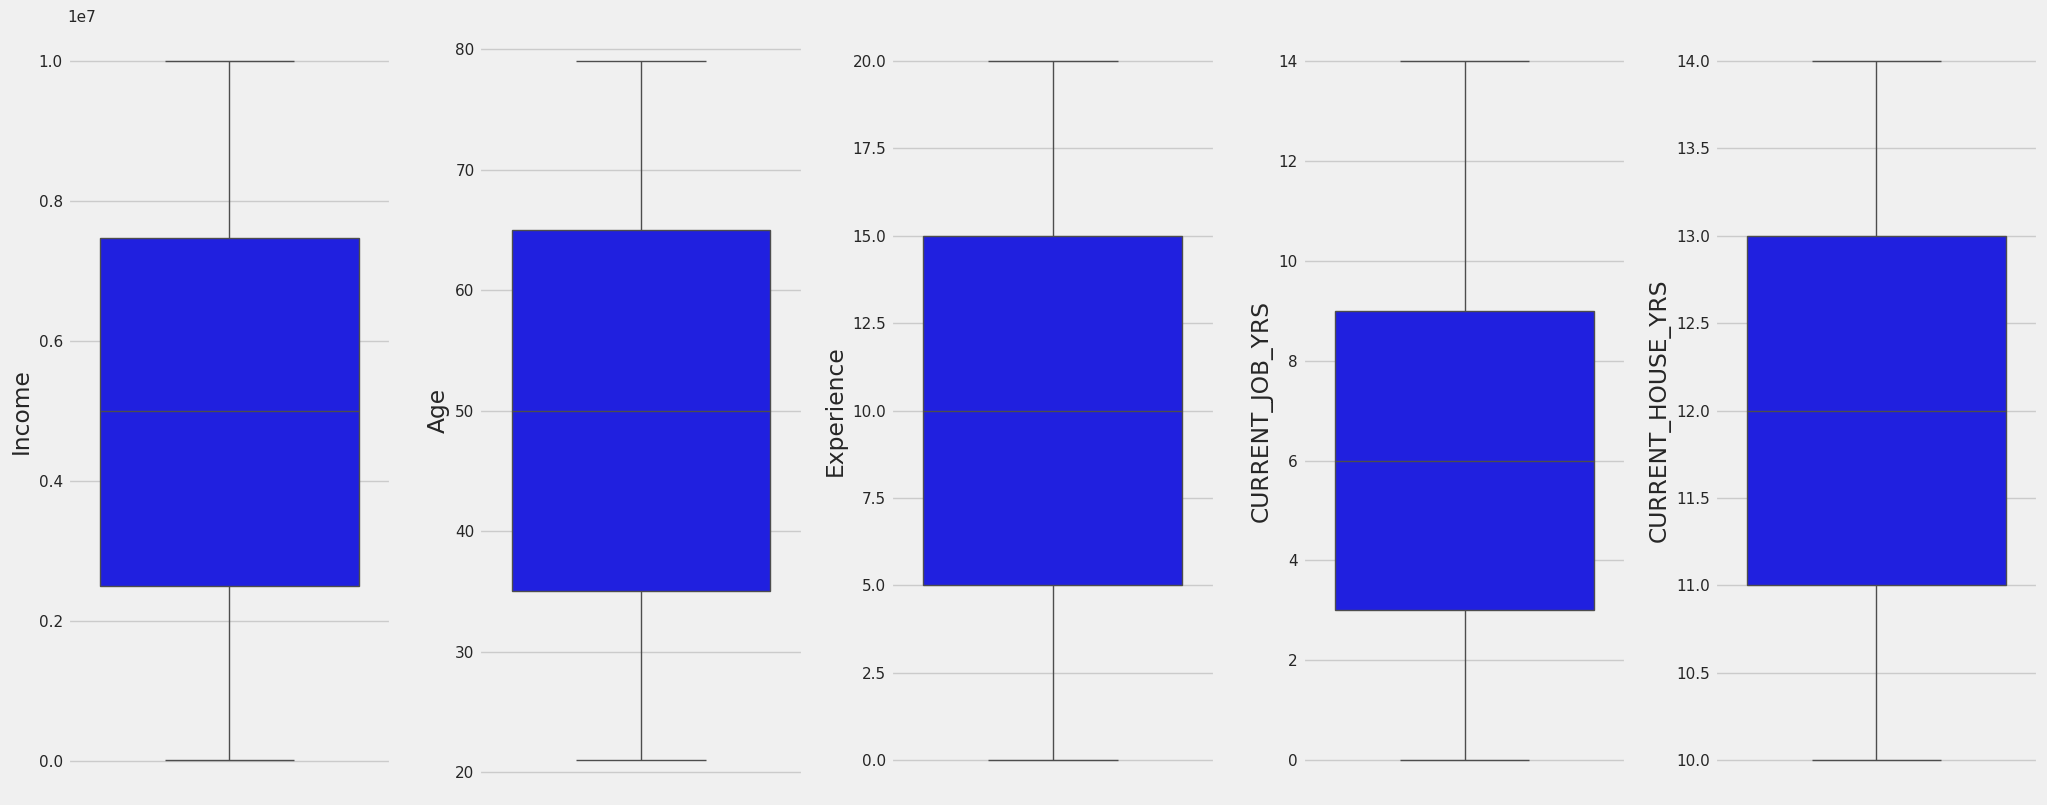

In [ ]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

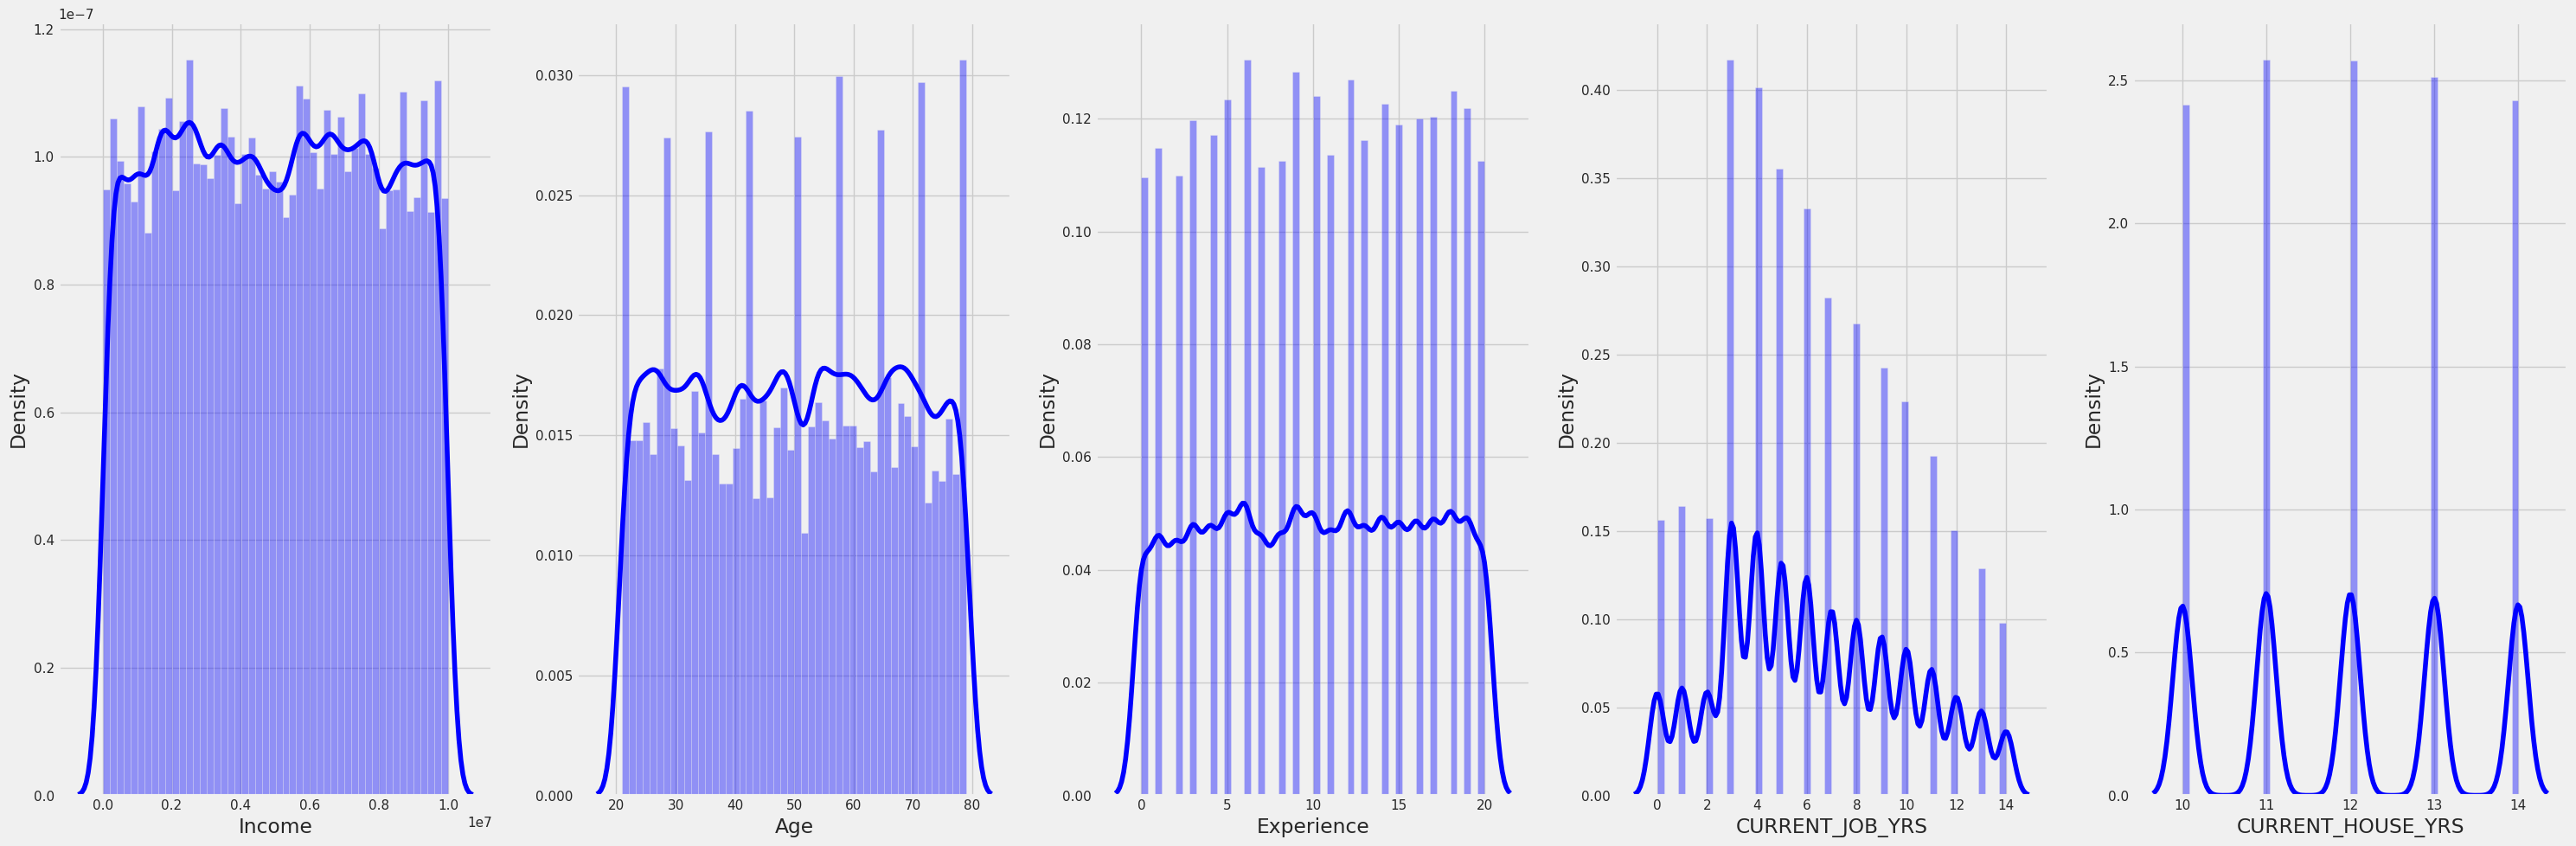

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

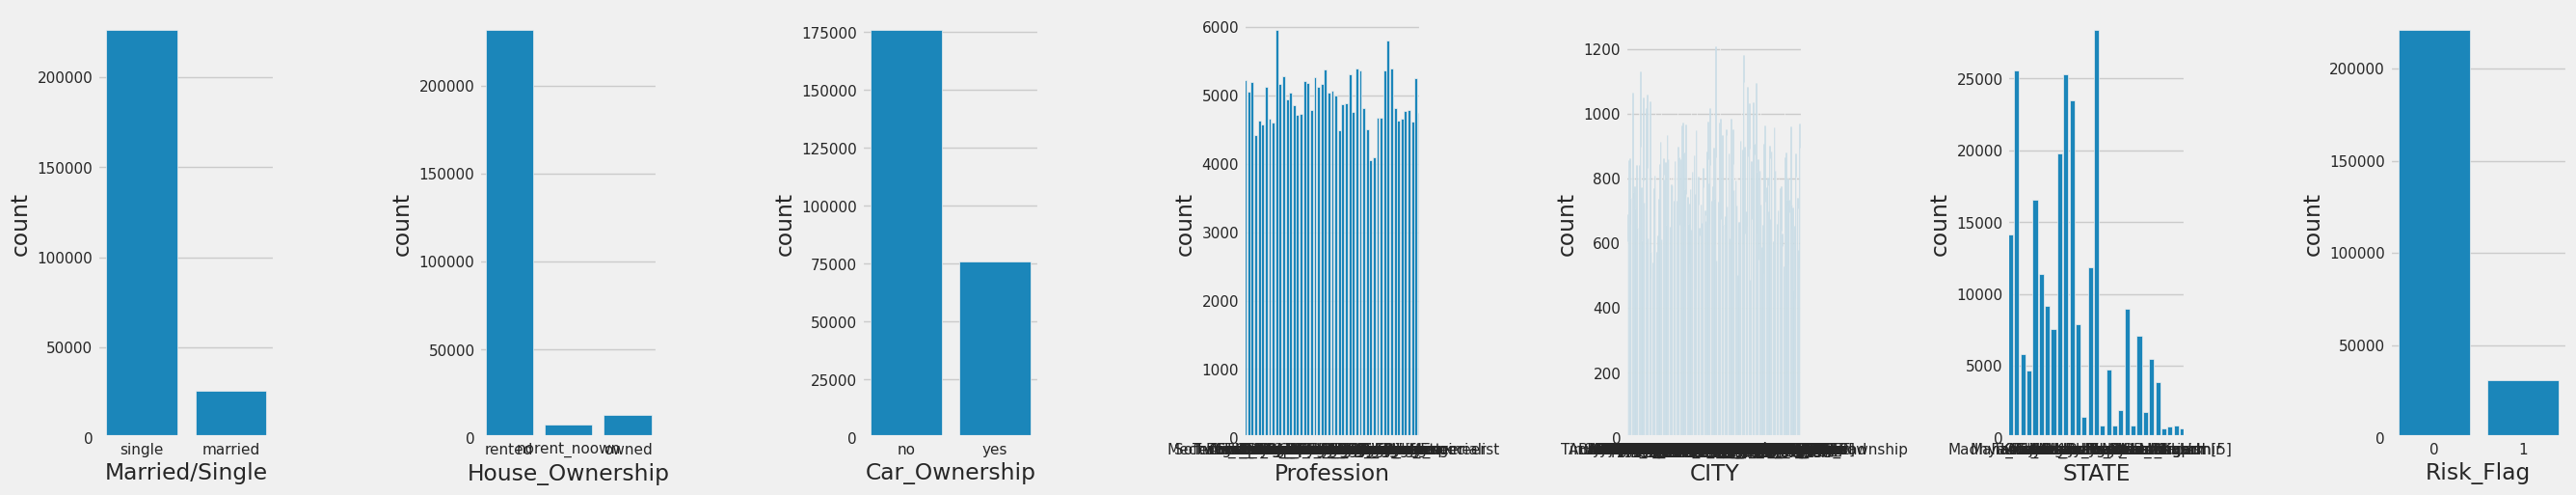

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(1, len(cats)):
  plt.subplot(2, len(cats), i+1)
  sns.countplot(x=df[cats[i]])
  plt.tight_layout()

Pada kolom Married/Single nilai single sebanyak 90% sangat mendominasi jauh dibandingkan Married


Pada kolom House Ownership nilai rented sebanyak 92% sangat mendominasi jauh dibandingkan Own dan norent_noown


Pada kolom Car_Ownership nilai No sebanyak 70% sangat mendominasi dibandingkan Yes


Pada kolom Profession, City, & State memiliki kategori yang variatif

Pada kolom Risk Flag, 0 sangat mendominasi dibandingkan 1


**Risk Flag berdasarkan status**

Text(0.55, 0.02, 'Married/Single')

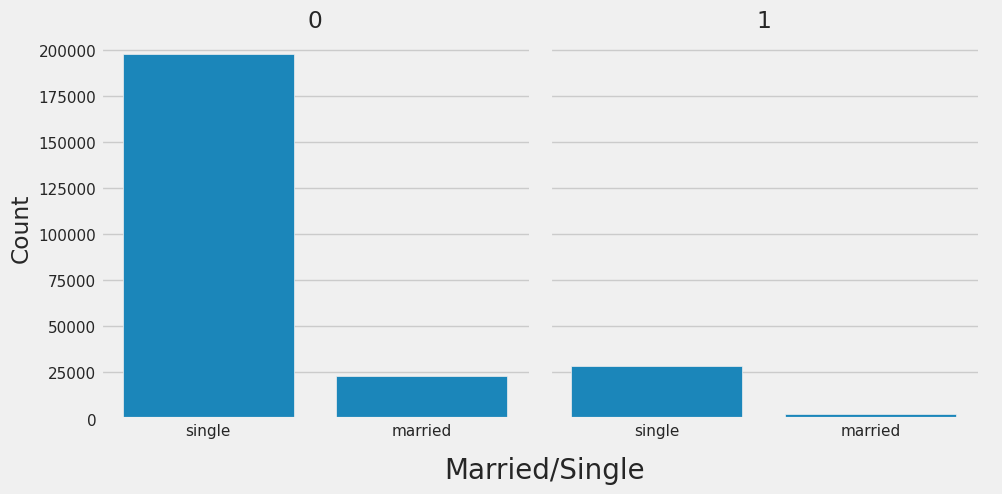

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5)
g.map(sns.countplot, "Married/Single")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")
g.fig.text(0.55, 0.02, "Married/Single", ha="center", fontsize=20)

**Risk Flag berdasarkan House Ownership**

Text(0.55, 0.02, 'House Ownership')

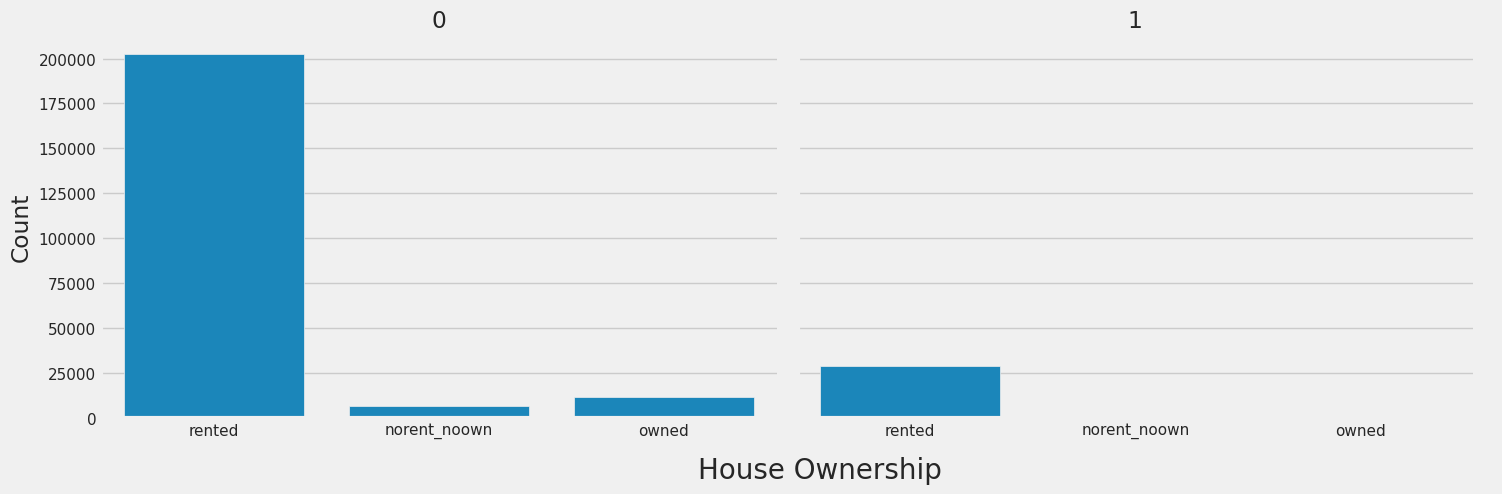

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5, aspect=1.5)
g.map(sns.countplot, "House_Ownership")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")
g.fig.text(0.55, 0.02, "House Ownership", ha="center", fontsize=20)

**Risk Flag berdasarkan Car Ownership**

Text(0.55, 0.02, 'Car Ownership')

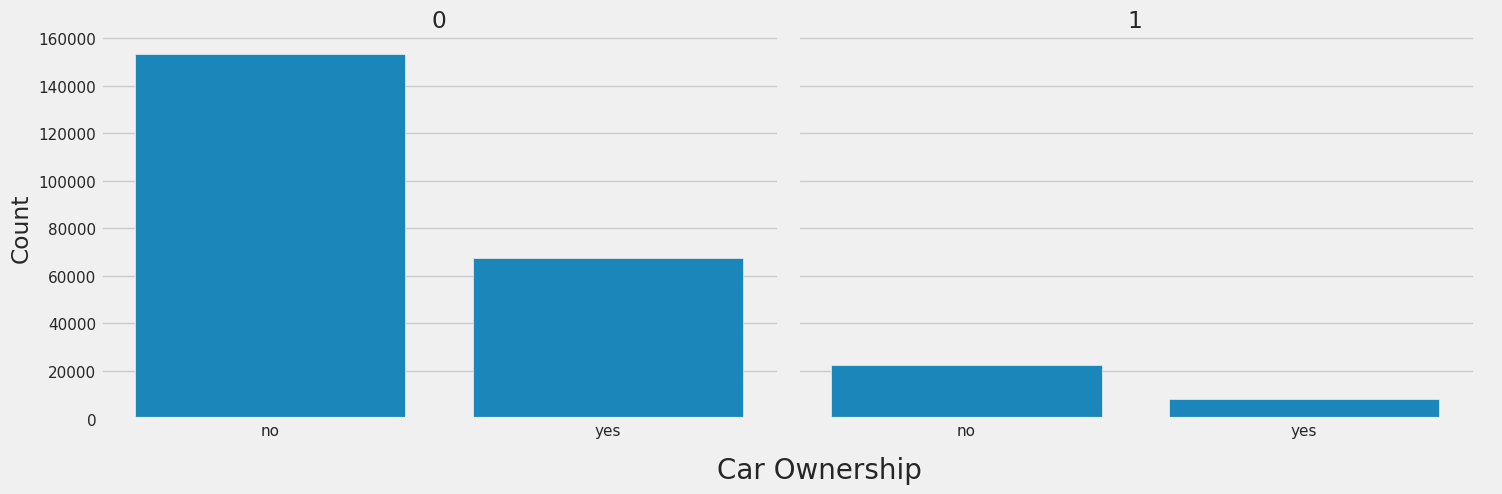

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=5, aspect=1.5)
g.map(sns.countplot, "Car_Ownership")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("", "Count")
g.fig.text(0.55, 0.02, "Car Ownership", ha="center", fontsize=20)

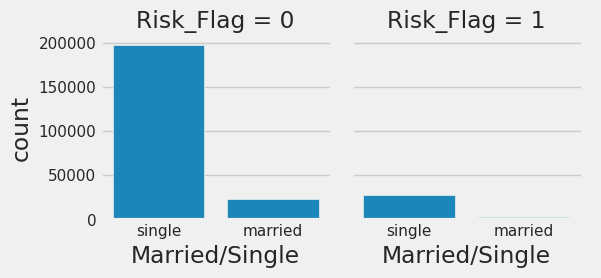

In [ ]:
g = sns.FacetGrid(df, col='Risk_Flag', col_wrap=2, height=3)
g.map(sns.countplot, "Married/Single")
g.add_legend()

##Multivariate Analysis

<Axes: >

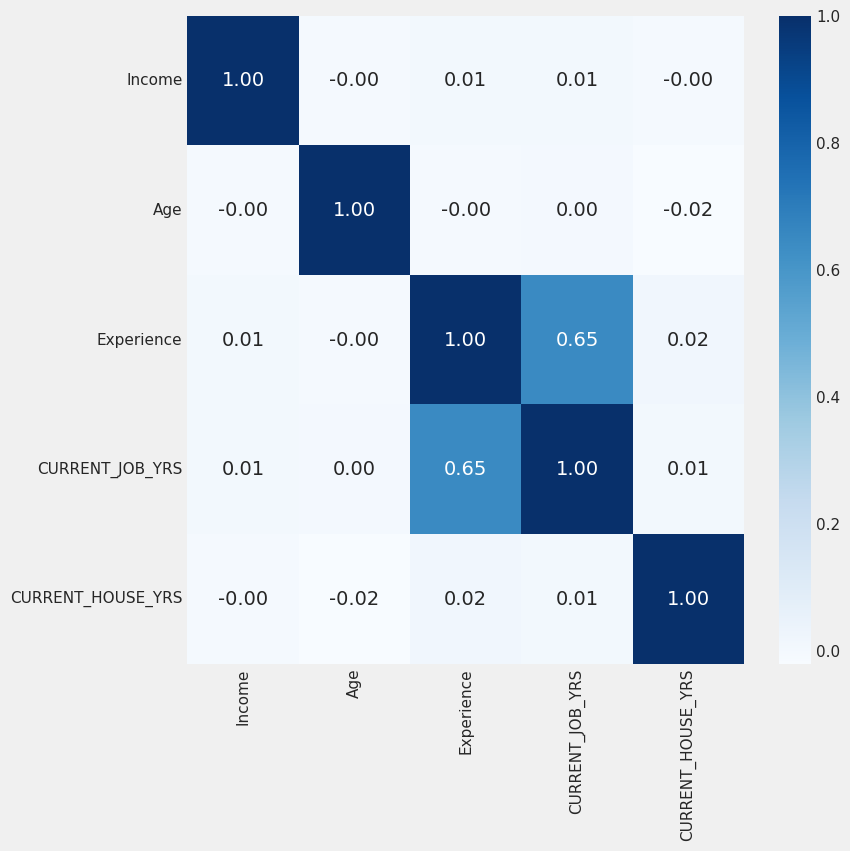

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 800x800 with 0 Axes>

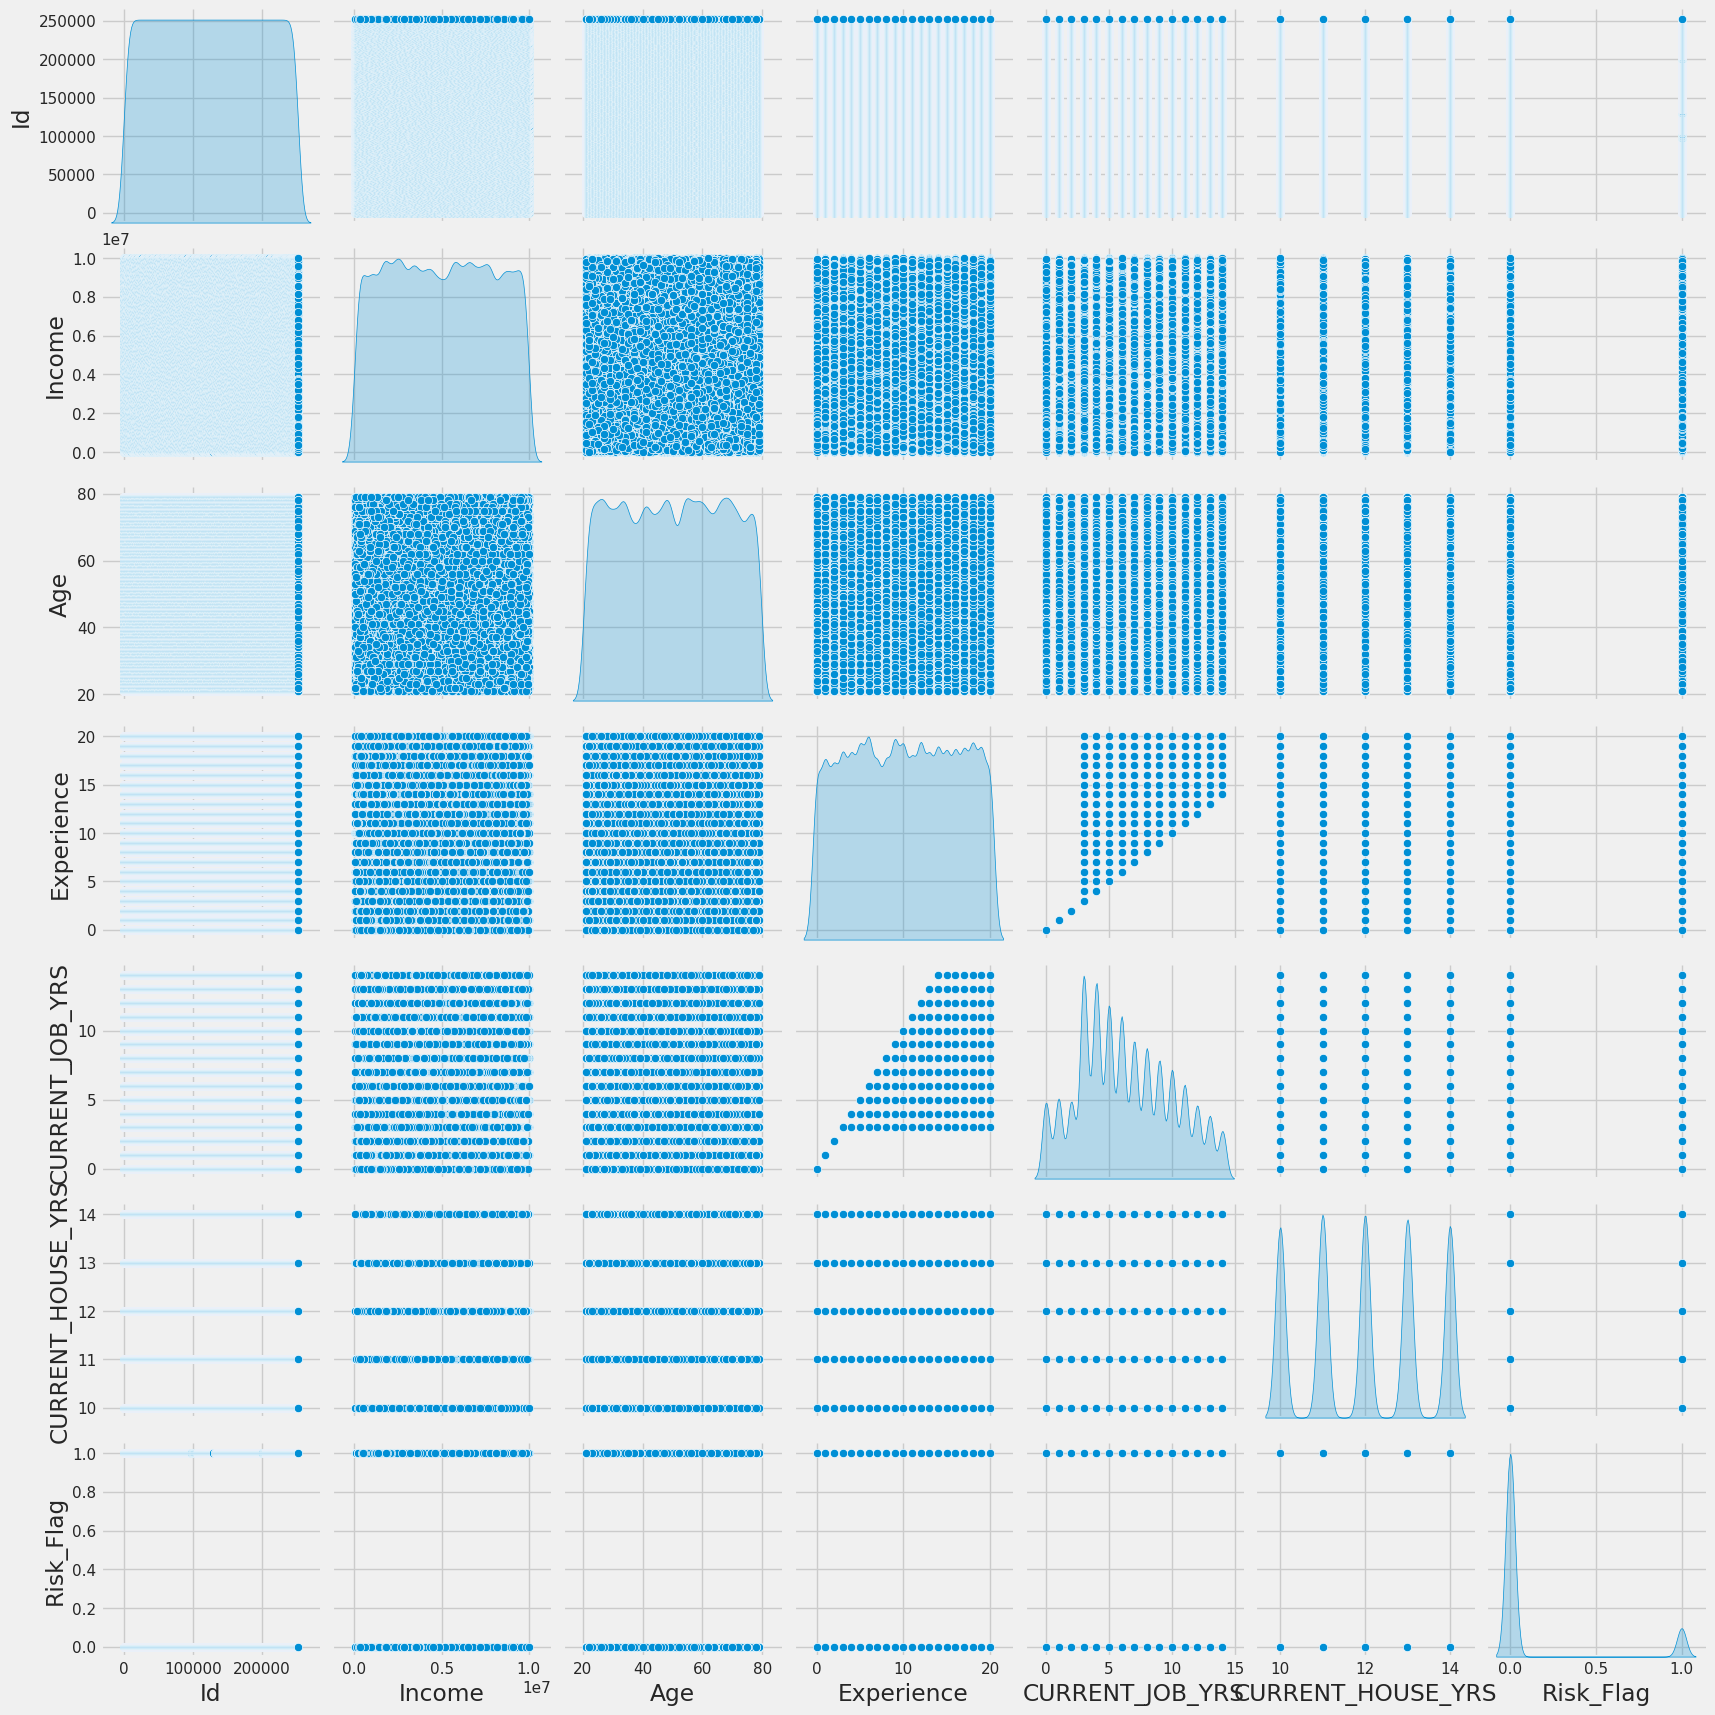

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde')

**Analytic based on group Income & group Age terhadap target variable**

In [ ]:
df['group_income'] = pd.qcut(df['Income'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])

In [ ]:
df['group_age'] = pd.cut(df['Age'], bins=[20, 25, 45, 65, float('inf')], labels=['Remaja', 'Dewasa', 'Lansia', 'Manula'])

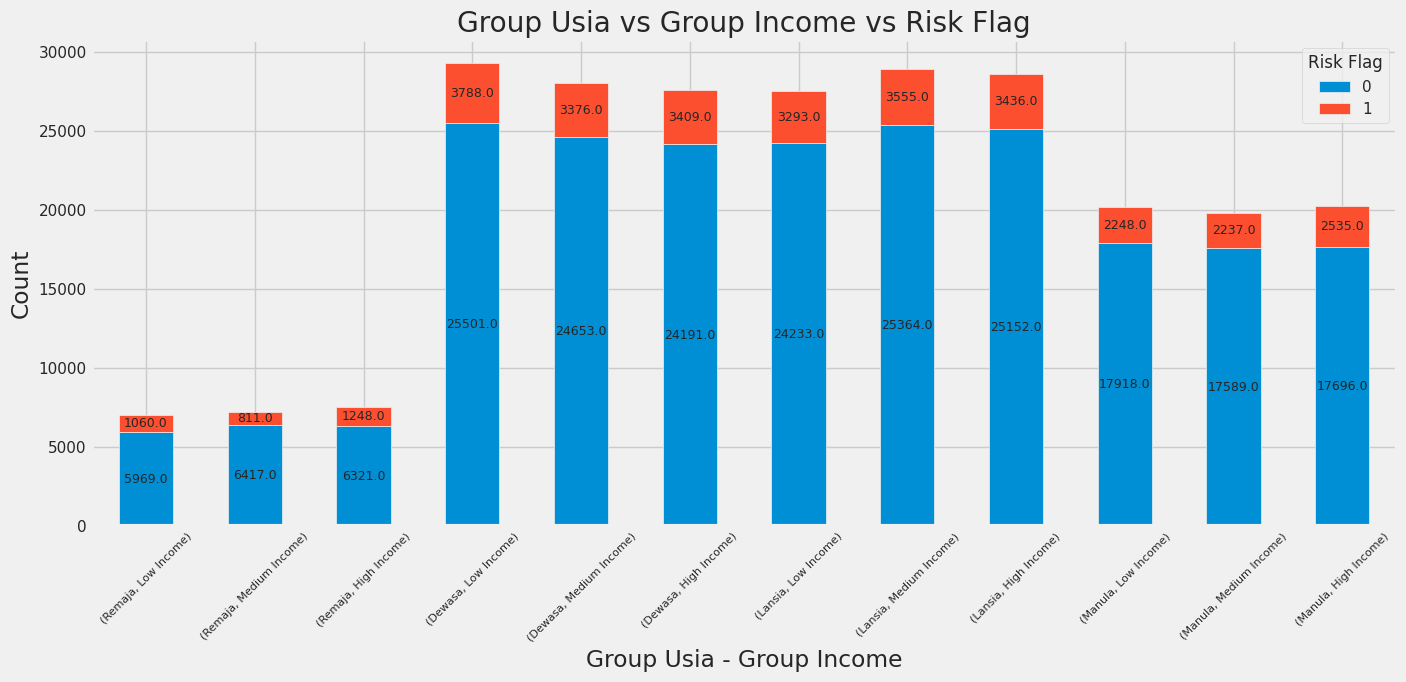

In [ ]:
contingency_table = pd.crosstab([df['group_age'], df['group_income']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Group Usia vs Group Income vs Risk Flag')
plt.xlabel('Group Usia - Group Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()

Berdasarkan grafik di atas bahwa tiap group usia dan group income sama-sama lebih dominan tidak beresiko risk flag dari pada yang beresiko risk flag.

Jumlah nasabah yang tidak beresiko risk flag yang terbesar yaitu pada group usia dewasa dan group low income sebesar 25501. Sebaliknya yang terkecil adalah group usia remaja dan group low income sebesar 5969.

Jumlah nasabah yang beresiko risk flag yang terbesar yaitu pada group usia dewasa dan group low income sebesar 3788. Sebaliknya yang terkecil adalah group usia remaja dan group medium income sebesar 811.


**Analytic based on group Income & status Married/Single terhadap target variable**

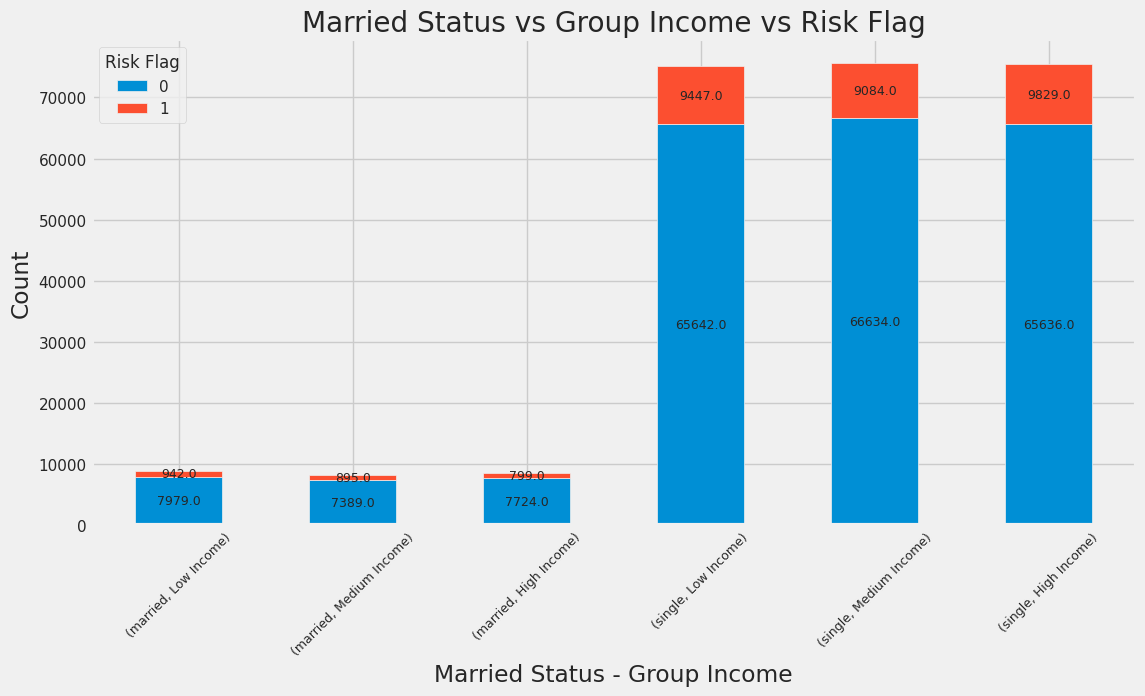

In [ ]:
contingency_table = pd.crosstab([df['Married/Single'], df['group_income']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Married Status vs Group Income vs Risk Flag')
plt.xlabel('Married Status - Group Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()

Berdasarkan grafik di atas, nasabah dengan status single dan rentang pendapatan High Income cenderung memiliki tingkat resiko cukup tinggi dalam gagal bayar pinjaman (memiliki risk flag yang terbesar) sebesar 9829 .

Sebaliknya untuk nasabah dengan status married dan rentang pendapatan High Income justru memiliki tingkat risk flag terendah sebesar 799.


**Analytic based on group Income & House Ownership terhadap target variable**

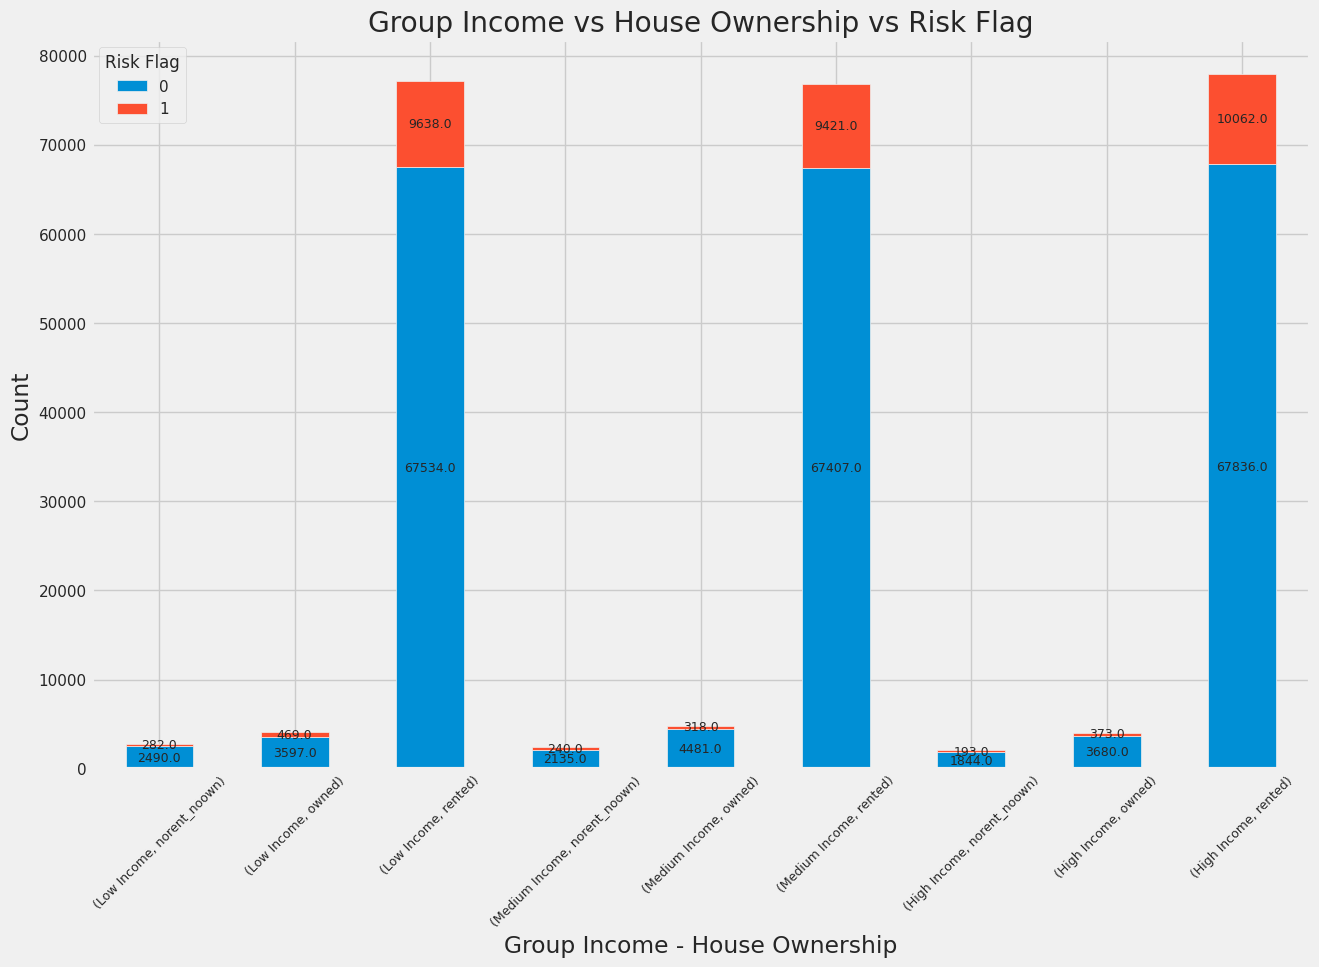

In [ ]:
contingency_table = pd.crosstab([df['group_income'], df['House_Ownership']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(14, 9))
plt.title('Group Income vs House Ownership vs Risk Flag')
plt.xlabel('Group Income - House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()

Berdasarkan grafik di atas, bahwa tiap group income dan group house ownership sama-sama lebih dominan tidak beresiko risk flag dari pada yang beresiko risk flag.

Berdasarkan grafik di atas, bahwa group rented yang memiliki resiko risk flag terbesar sekaligus tidak memiliki resiko risk flag yang terbesar.

Berdasarkan grafik di atas, bahwa group norent noown yang memiliki resiko risk flag terkecil sekaligus tidak memiliki resiko risk flag yang terkecil.

Jumlah nasabah yang tidak beresiko risk flag yang terbesar yaitu pada group high income dan group rented sebesar 67836. Sebaliknya yang terkecil adalah group medium income dan group norent noown sebesar 1844.

Jumlah nasabah yang beresiko risk flag yang terbesar yaitu pada group high income dan group rented sebesar 10062. Sebaliknya yang terkecil adalah group medium income dan group norent noown sebesar 193.


**Analytic based on group Income, House Own, & Car Own terhadap target variable**

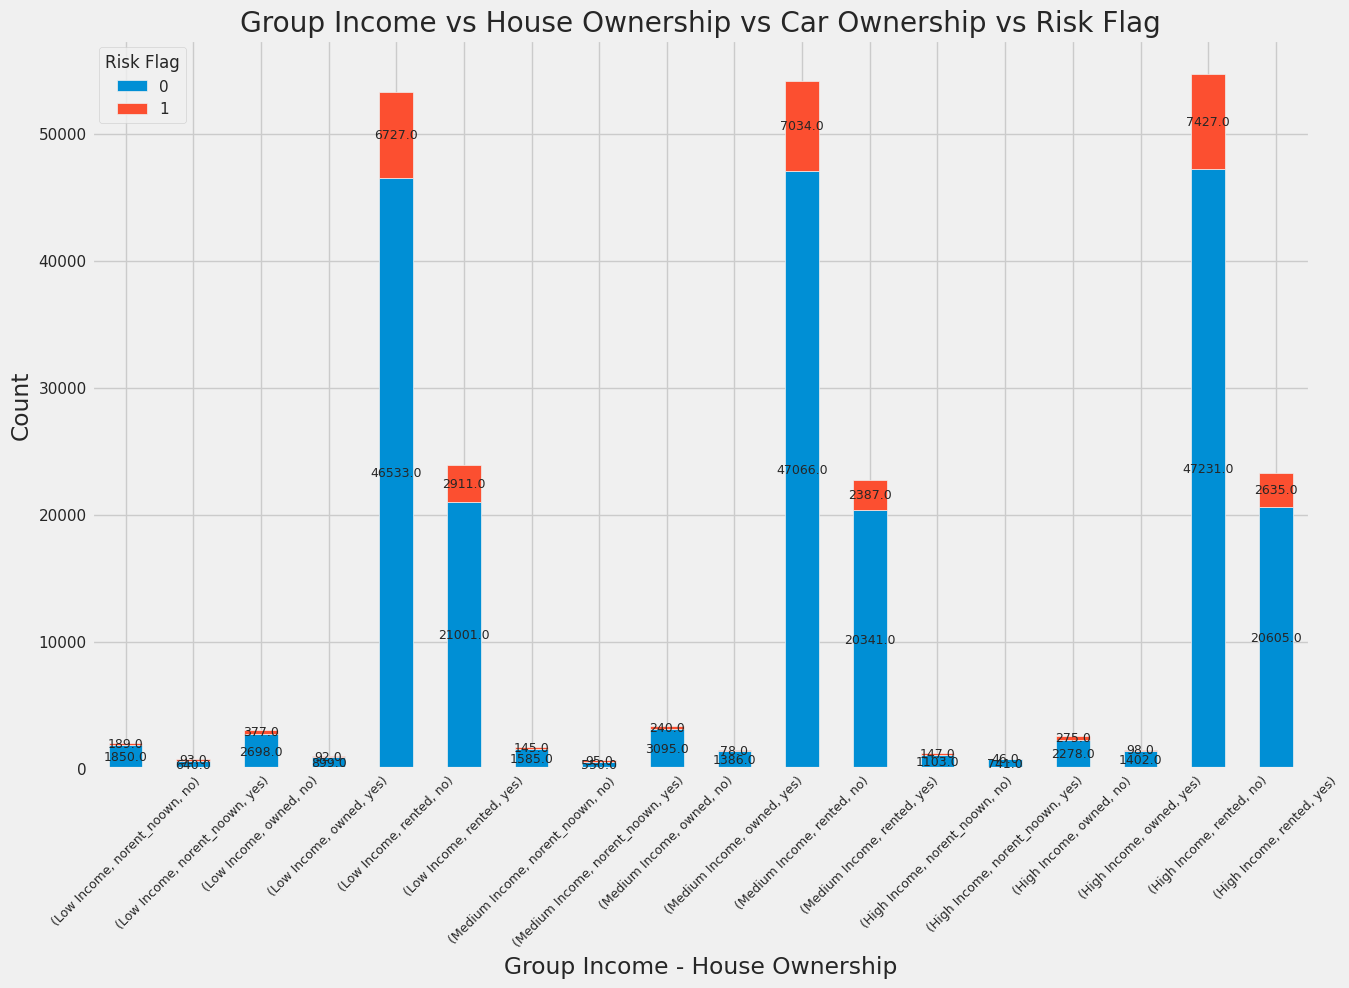

In [ ]:
contingency_table = pd.crosstab([df['group_income'], df['House_Ownership'], df['Car_Ownership']], df['Risk_Flag'], margins=True)

ax = contingency_table.drop(index='All', columns=['All']).plot(kind='bar', stacked=True, figsize=(14, 9))
plt.title('Group Income vs House Ownership vs Car Ownership vs Risk Flag')
plt.xlabel('Group Income - House Ownership')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=9)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9)

plt.show()

**Analytic based on group Income & Profession terhadap target variable (top 5)**

<Figure size 1200x700 with 0 Axes>

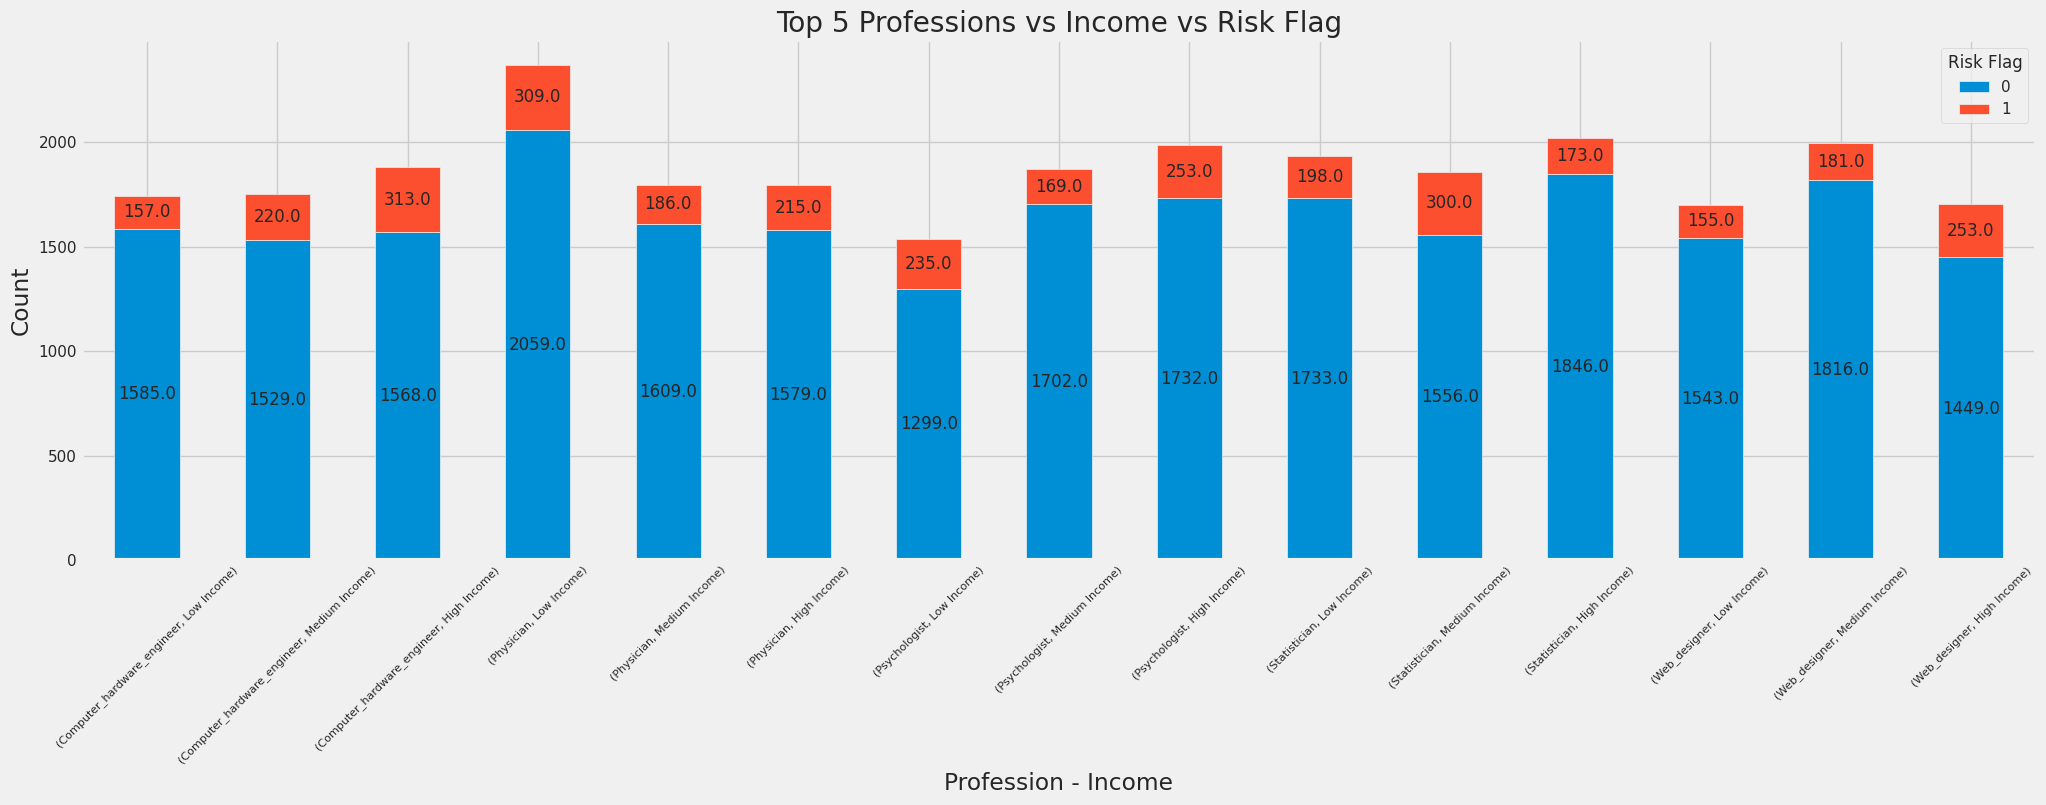

In [ ]:
top_5_professions = df['Profession'].value_counts().head(5).index.tolist()

filtered_data_top = df[df['Profession'].isin(top_5_professions)]

contingency_table_top = pd.crosstab([filtered_data_top['Profession'], filtered_data_top['group_income']], filtered_data_top['Risk_Flag'], margins=True)

plt.figure(figsize=(12, 7))
ax = contingency_table_top.drop(index='All', columns=['All']).plot(kind='bar', stacked=True)
plt.title('Top 5 Professions vs Income vs Risk Flag')
plt.xlabel('Profession - Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

**Analytic based on group Income & Profession terhadap target variable (bottom 5)**

<Figure size 1200x600 with 0 Axes>

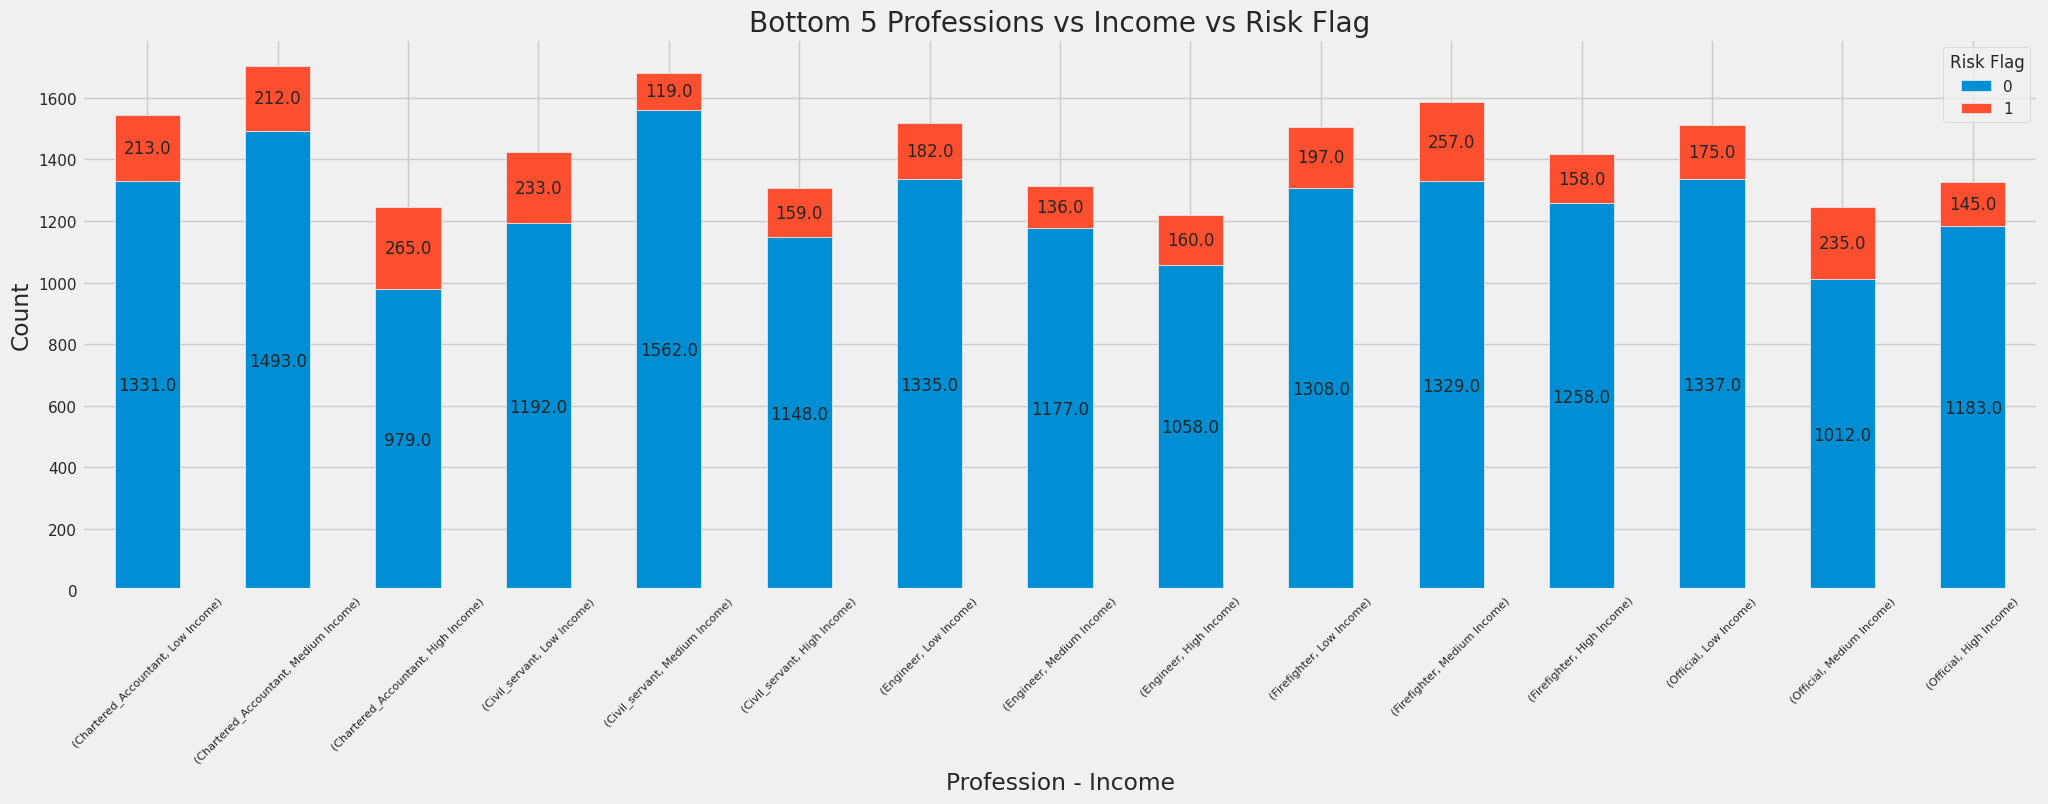

In [ ]:
bottom_5_professions = df['Profession'].value_counts().tail(5).index.tolist()

filtered_data_bottom = df[df['Profession'].isin(bottom_5_professions)]

contingency_table_top = pd.crosstab([filtered_data_bottom['Profession'], filtered_data_bottom['group_income']], filtered_data_bottom['Risk_Flag'], margins=True)

plt.figure(figsize=(12, 6))
ax = contingency_table_top.drop(index='All', columns=['All']).plot(kind='bar', stacked=True)
plt.title('Bottom 5 Professions vs Income vs Risk Flag')
plt.xlabel('Profession - Income')
plt.ylabel('Count')
plt.legend(title='Risk Flag')
plt.xticks(rotation=45, fontsize=8)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# Pre Processing Data

## Handle missing values

In [ ]:
null_counts = df.isna().sum()
print(null_counts)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
group_income         0
group_age            0
income_value         0
house_value          0
car_value            0
net_worth            0
dtype: int64


## Handle duplicated data

In [ ]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

# Feature encoding

In [ ]:
mapping_Car_Ownership = {
    'yes' : 1,
    'no' : 0
}

df['Car_Ownership'] = df['Car_Ownership'].map(mapping_Car_Ownership)


In [ ]:
mapping_Married_Single = {
    'married' : 1,
    'single' : 0
}

df['Married/Single'] = df['Married/Single'].map(mapping_Married_Single)



In [ ]:
mapping_House_Ownership = {
    'rented' : 1,
    'owned' : 2,
    'norent_noown' : 0
}

df['House_Ownership'] = df['House_Ownership'].map(mapping_House_Ownership)



In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Handle class imbalance

In [ ]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [ ]:
df_model = df.drop(columns=['Id', 'Profession', 'CITY', 'STATE']).copy()

In [ ]:
df_model.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,prod_yrs_left
0,1303834,23,3,0,1,0,3,13,0,41
1,7574516,40,10,0,1,0,9,13,0,24
2,3991815,66,4,1,1,0,4,10,0,0
3,6256451,41,2,0,1,1,2,12,1,23
4,5768871,47,11,0,1,0,3,14,1,17


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

for feature in df_model.columns:
  if feature != 'Risk_Flag':
    df_model[feature] = scale.fit_transform(df_model[[feature]].values.reshape(len(df_model), 1))[:, 0]

df_model.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,prod_yrs_left
0,-1.283145,-1.579604,-1.180232,-0.337200,-0.080826,-0.657129,-0.914131,0.716356,0,1.722627
1,0.895457,-0.583344,-0.014067,-0.337200,-0.080826,-0.657129,0.731036,0.716356,0,0.548191
2,-0.349269,0.940348,-1.013637,2.965599,-0.080826,-0.657129,-0.639936,-1.427981,0,-1.109836
3,0.437526,-0.524740,-1.346827,-0.337200,-0.080826,1.521772,-1.188325,0.001577,1,0.479107
4,0.268128,-0.173119,0.152528,-0.337200,-0.080826,-0.657129,-0.914131,1.431135,1,0.064600


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

undersampler = RandomUnderSampler(sampling_strategy={0: 151200})
smote = SMOTE(sampling_strategy={1: 100800})

X_resampled, y_resampled = undersampler.fit_resample(df_model.drop(['Risk_Flag'], axis=1), df_model['Risk_Flag'])
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

print(f'label 0 sejumlah {(y_resampled.value_counts()[0] / df_model.shape[0])*100}% dan label 1 sejumlah {(y_resampled.value_counts()[1] / df_model.shape[0])*100}%')

label 0 sejumlah 60.0% dan label 1 sejumlah 40.0%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

def plot_confusion_matrix_roc_curve(y_train, y_pred_train, y_test, y_pred_test, title, y_prob, average='macro'):
    cm = confusion_matrix(y_test, y_pred_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    metrics = {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Value (train)': [
            accuracy_score(y_train, y_pred_train) * 100,
            precision_score(y_train, y_pred_train, average=average) * 100,
            recall_score(y_train, y_pred_train, average=average) * 100,
            f1_score(y_train, y_pred_train, average=average) * 100
        ],
        'Value (test)': [
            accuracy_score(y_test, y_pred_test) * 100,
            precision_score(y_test, y_pred_test, average=average) * 100,
            recall_score(y_test, y_pred_test, average=average) * 100,
            f1_score(y_test, y_pred_test, average=average) * 100
        ]
    }

    metrics_df = pd.DataFrame(metrics)
    metrics_df['Value (train)'] = metrics_df['Value (train)'].map(lambda x: f"{x:.2f} %")
    metrics_df['Value (test)'] = metrics_df['Value (test)'].map(lambda x: f"{x:.2f} %")

    styled_metrics_df = metrics_df.style.applymap(lambda x: 'color: red;' if 'train' in x else 'color: blue;', subset=['Value (train)', 'Value (test)'])
    display(styled_metrics_df)

    print()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title("Confusion Matrix of " + title, fontsize=17)

    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(title + " ROC Curve", fontsize=17)
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

###Model Logistic Regression

,Metrics,Value (train),Value (test)
0,Accuracy,60.06 %,59.84 %
1,Precision,53.06 %,53.56 %
2,Recall,50.01 %,50.01 %
3,F1-Score,37.61 %,37.52 %


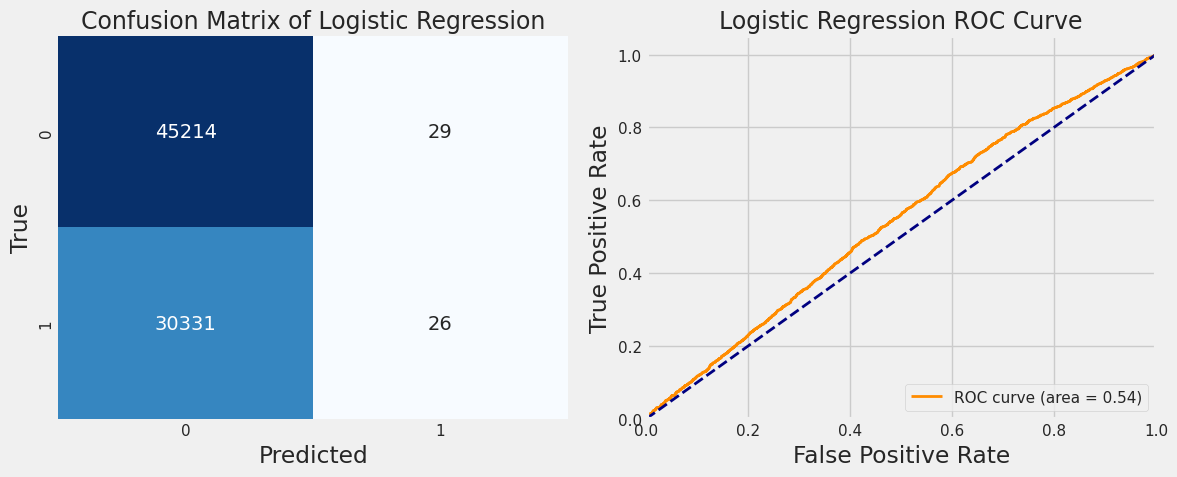

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

plot_confusion_matrix_roc_curve(y_train, y_pred_train, y_test, y_pred_test, "Logistic Regression", y_prob)

Dari hasil pemodelan dengan algoritma Logistic Regression secara default, mendapatkan nilai seperti pada tabel diatas. Dari hasil tersebut didapatkan nilai metrics yang masih terbilang rendah akan tetapi dari nilai test dan train yang didapatkan model sangat fit.

###Model KNN

,Metrics,Value (train),Value (test)
0,Accuracy,90.81 %,88.98 %
1,Precision,90.19 %,88.36 %
2,Recall,91.42 %,89.41 %
3,F1-Score,90.59 %,88.72 %


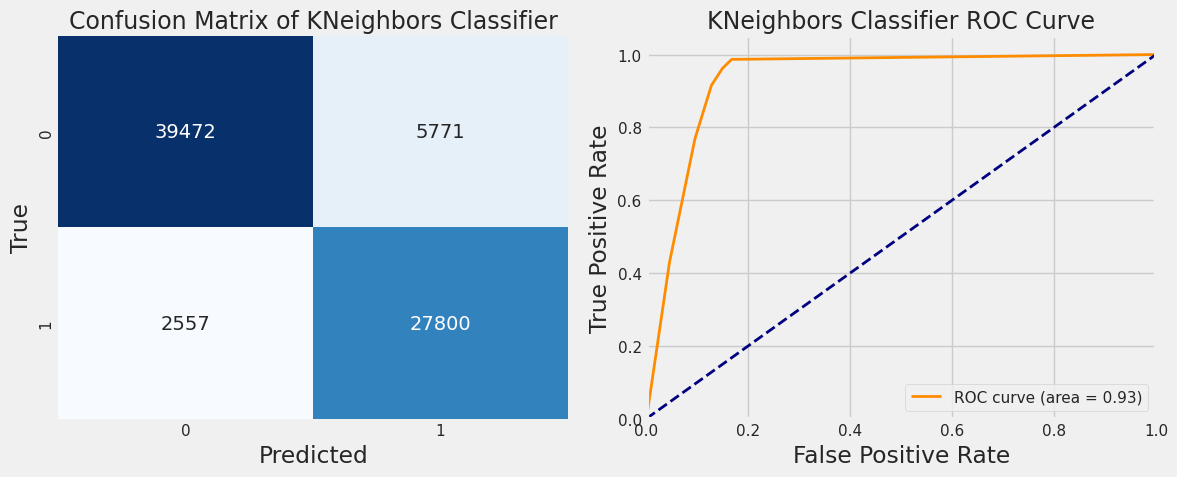

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

plot_confusion_matrix_roc_curve(y_train, y_pred_train, y_test, y_pred_test, "KNeighbors Classifier", y_prob)

Dari hasil pemodelan dengan algoritma K-Nearest Neighbour secara default, mendapatkan nilai seperti pada tabel diatas. Dari hasil tersebut didapatkan nilai metrics yang lebih baik dari hasil Logistic Regression. Model tersebut memiliki overfit sekitar 2% untuk metrics-metricsnya.

###Model Random Forest

,Metrics,Value (train),Value (test)
0,Accuracy,94.89 %,91.32 %
1,Precision,94.33 %,90.73 %
2,Recall,95.73 %,91.66 %
3,F1-Score,94.77 %,91.09 %


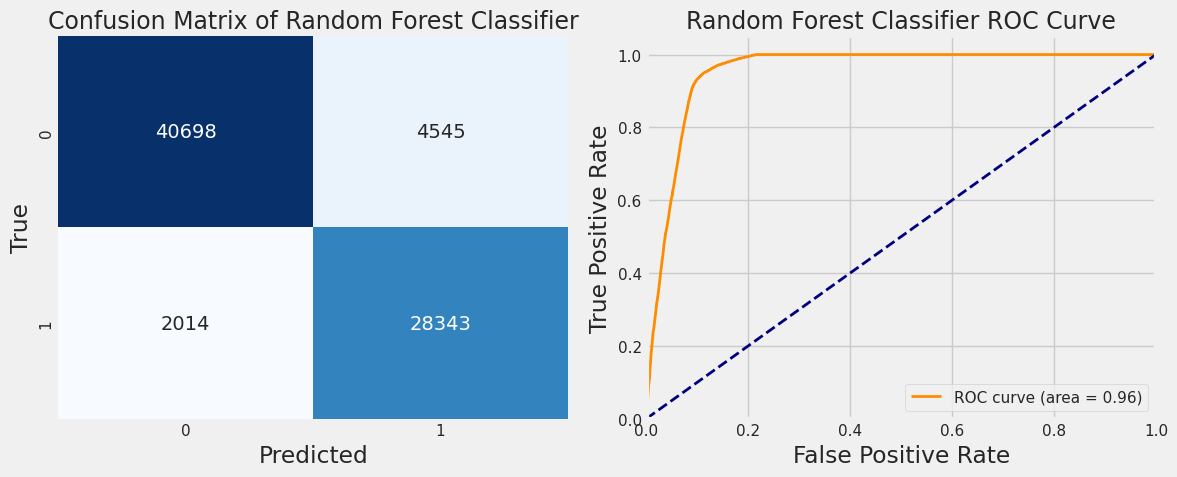

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_train = rand_forest.predict(X_train)
y_pred_test = rand_forest.predict(X_test)
y_prob = rand_forest.predict_proba(X_test)[:, 1]

plot_confusion_matrix_roc_curve(y_train, y_pred_train, y_test, y_pred_test, "Random Forest Classifier", y_prob)

Dari hasil pemodelan dengan algoritma Random Forest secara default, mendapatkan nilai seperti pada tabel diatas. Dari hasil tersebut didapatkan nilai metrics yang lebih baik lagi dari hasil KNN.

Dari semua model tampaknya RF memberikan performa terbaik dibandingkan lainnya. Akan tetapi masih overfit pada train dengan test khususnya pada recal.

###Tuning hyperparameter model Random Forest

,Metrics,Value (train),Value (test)
0,Accuracy,89.92 %,87.93 %
1,Precision,89.63 %,87.75 %
2,Recall,89.28 %,86.98 %
3,F1-Score,89.44 %,87.32 %


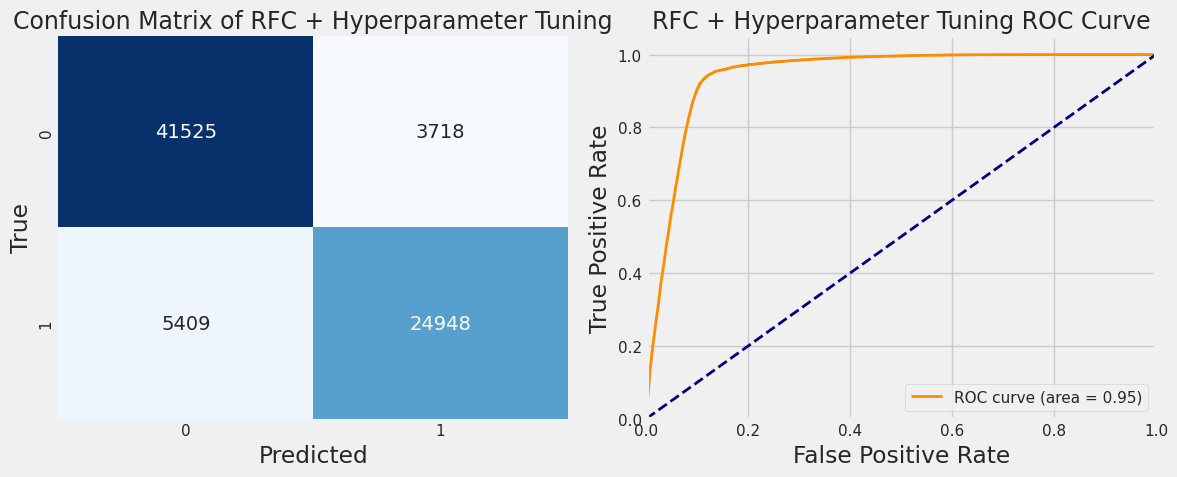

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200]
criterion = ['gini']
max_depth = [20]
min_samples_split = [10]
min_samples_leaf = [2]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rf_tunned = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=42, cv=5)
rf_tunned.fit(X_train, y_train)
y_pred_train = rf_tunned.predict(X_train)
y_pred_test = rf_tunned.predict(X_test)
y_prob = rf_tunned.predict_proba(X_test)[:, 1]

plot_confusion_matrix_roc_curve(y_train, y_pred_train, y_test, y_pred_test, "RFC + Hyperparameter Tuning", y_prob)

###Membuat threshold dari kurva ROC data test

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

desired_thresholds = np.arange(0.1, 1.0, 0.1)

results = []

for thresh in desired_thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    results.append([thresh, accuracy, precision, recall, f1])

results_df = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

results_df

,Threshold,Accuracy,Precision,Recall,F1-Score
0,0.1,0.604656,0.503894,0.999638,0.670038
1,0.2,0.721984,0.591435,0.994960,0.741876
2,0.3,0.848955,0.734300,0.977567,0.838649
3,0.4,0.905754,0.847452,0.933294,0.888304
4,0.5,0.879272,0.870299,0.821820,0.845365
5,0.6,0.819392,0.881923,0.635274,0.738549
6,0.7,0.761376,0.891937,0.461673,0.608422
7,0.8,0.695304,0.906507,0.268933,0.414806
8,0.9,0.624854,0.933160,0.070824,0.131655


###Mencari Feature Importance dari Model

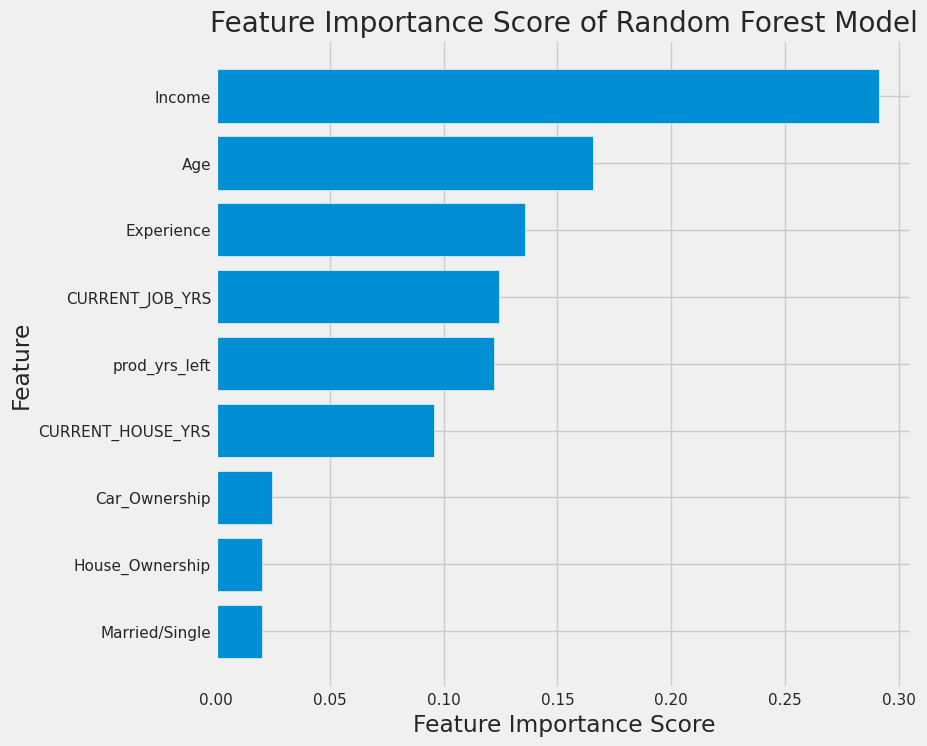

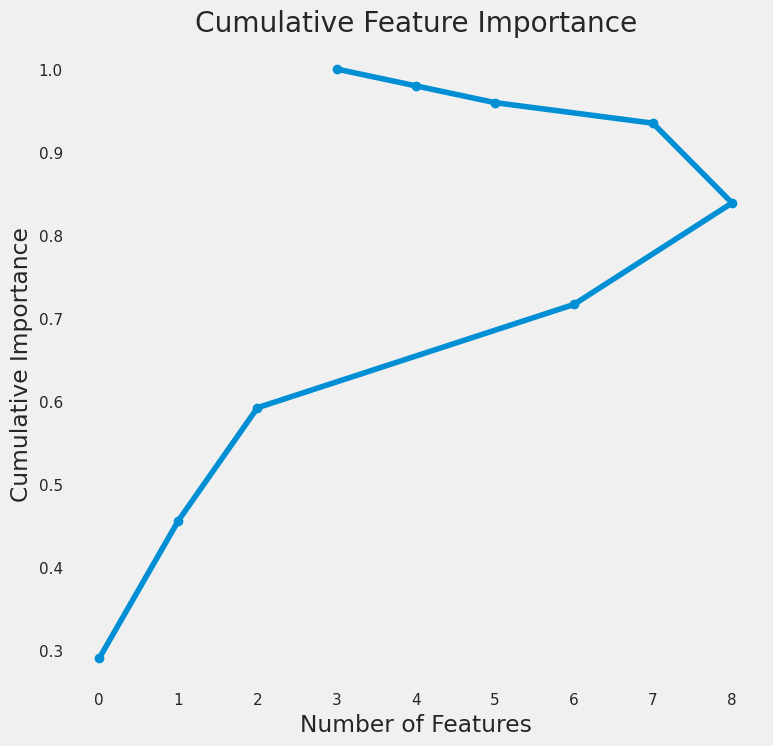

Fitur-fitur penting dengan cumulative importance <= 0.95:
0               Income
1                  Age
2           Experience
6      CURRENT_JOB_YRS
8        prod_yrs_left
7    CURRENT_HOUSE_YRS
Name: Feature, dtype: object


In [ ]:
best_rf = rf_tunned.best_estimator_
feature_importance = best_rf.feature_importances_

feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score of Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

plt.figure(figsize=(8, 8))
plt.plot(importance_df['Cumulative Importance'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid()
plt.show()

threshold = 0.95
important_features = importance_df[importance_df['Cumulative Importance'] <= threshold]['Feature']
print(f"Fitur-fitur penting dengan cumulative importance <= {threshold}:")
print(important_features)



1. Business Insight: Lama bekerja di pekerjaan saat ini bisa menunjukkan stabilitas pekerjaan dan kepuasan dalam posisi tersebut dengan rata-rata lama bekerja selama 6 tahun dengan income rata-rata sebesar 5,000,449

  Business Recommendation: Pertimbangkan lama bekerja di pekerjaan saat ini sebagai faktor dalam proses penilaian kredit. Nasabah yang telah lama bekerja di satu tempat mungkin diberi penawaran pinjaman yang lebih baik karena menunjukkan stabilitas yang lebih tinggi.


2. Business  Insight: Pendapatan nasabah merupakan salah satu faktor penting dalam memprediksi kemungkinan gagal bayar. Nasabah dengan pendapatan yang lebih tinggi cenderung memiliki pengalaman kerja yang lama, bekerja di pekerjaan saat ini dalam jangka waktu yang lama, sisa umur produktif kemungkinan tinggal sedikit, dan memiliki kemampuan lebih besar untuk membayar pinjaman mereka tepat waktu Rata-rata umur nasabah yang tidak tergolong dalam risk flag adalah 50 tahun.

  Business Recommendation: Dibutuhkan informasi nilai bunga untuk memitigasi resiko nasabah akan menunggak atau tidak dengan Perketat persyaratan pendapatan minimum untuk aplikasi pinjaman. Berikan pinjaman dengan bunga lebih rendah atau kondisi yang lebih baik kepada nasabah dengan pendapatan lebih tinggi untuk mengurangi risiko gagal bayar.

3. Business Insight : Lamanya umur nasabah menunjukkan seberapa besar income yang didapatkan, lamanya bekerja di posisi saat ini, lamanya bekerja di perusahaan saat ini, serta jumlah usia produktif yang tersisa dari nasabah.

  Business Recommendation: Mempertimbangkan usia saat ini sebagai faktor dalam proses penilaian kredit. Nasabah yang usianya kisaran 15 - 64 tahun sebaiknya diberi penawaran pinjaman berdasarkan kelompok remaja (15- 25 tahun), dewasa (26 - 45), dan lansia (46 - 64) yang mengacu ke DepKes RI 2009 karena memudahkan proses penilaian kredit.

4. Business  Insight: Banyaknya sisa usia produktif dari nasabah menunjukkan seberapa besar income yang didapatkan, lamanya bekerja di posisi saat ini, lamanya bekerja di perusahaan saat ini, serta usia dari nasabah saat ini.

  Business Recommendation: Mempertimbangkan sisa usia produktif saat ini sebagai faktor dalam proses penilaian kredit. Nasabah yang sisa usia produktifnya kisaran 15 - 64 tahun sebaiknya diberi penawaran pinjaman karena menunjukkan masih memiliki usia yang produktif untuk bekerja.



